In [100]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

In [101]:
data = pd.read_csv("C:/Users/Ayush Gupta/Desktop/Semester 6/ML/ML_Practicals/car_prediction_dataset.csv")
data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
# Remove all the columns/features that are unusable from the algorithm.
# Linear Regression can only use numerical features, so to make this dataset usable, remove all the other features
data_new = data[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]
data_new.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Correlation =  0.5778155982921501


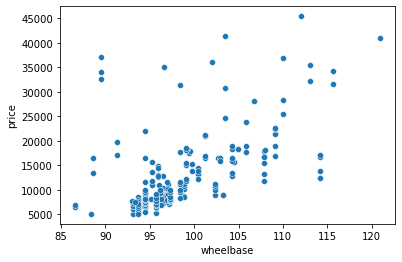

Correlation =  0.6829200156779623


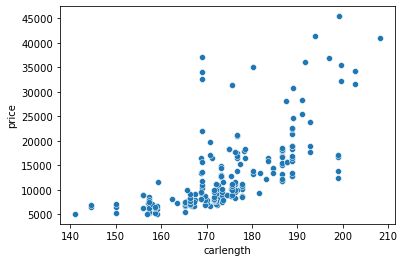

Correlation =  0.7593252997415114


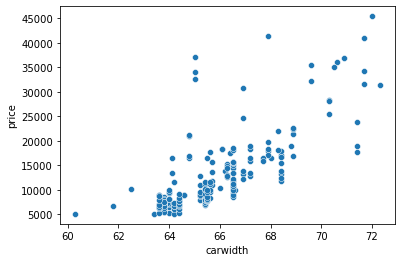

Correlation =  0.11933622657049447


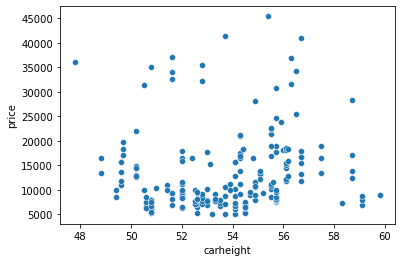

Correlation =  0.8353048793372966


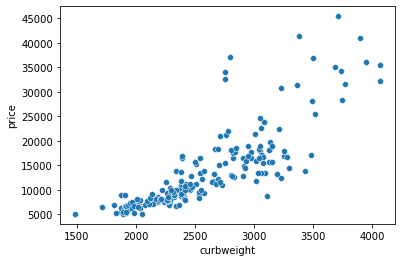

Correlation =  0.8741448025245118


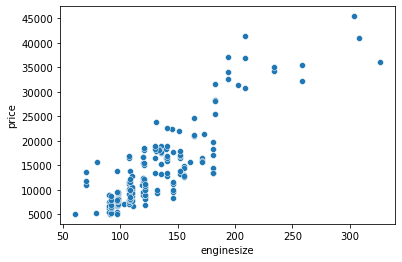

Correlation =  0.5531732367984437


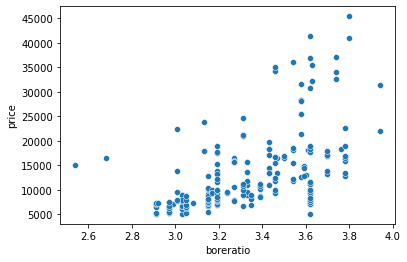

Correlation =  0.07944308388193101


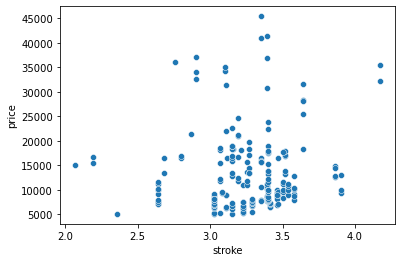

Correlation =  0.06798350579944264


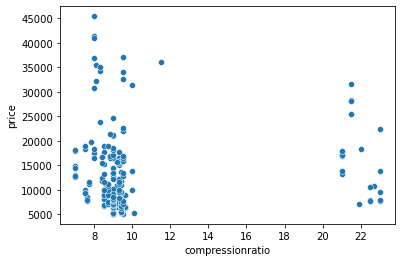

Correlation =  0.8081388225362216


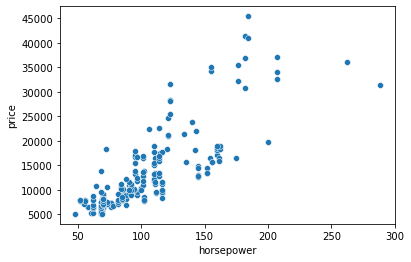

Correlation =  -0.08526715027785688


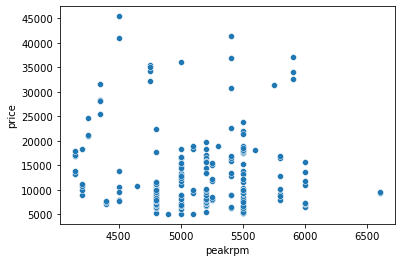

Correlation =  -0.6857513360270399


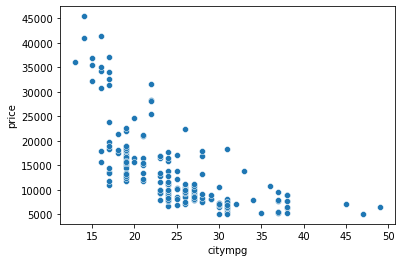

Correlation =  -0.6975990916465569


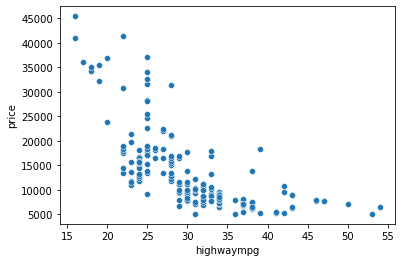

Correlation =  1.0


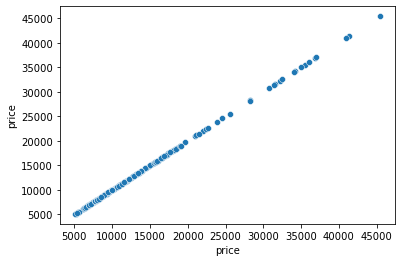

In [103]:
# Plot and compute correlations between the remaining cars’ features and the target variable price.

for feature in data_new:
    sns.scatterplot(x=data_new[feature], y=data_new["price"])
    print("Correlation = ", np.corrcoef(x = data_new[feature], y=data_new["price"])[1][0])
    plt.show()

In [104]:
# Drop the unnecessary columns (uncorrelated) for the Linear Regression algorithm

data_new = data_new.drop(["carheight","stroke","compressionratio","peakrpm","boreratio"], axis=1)
data_new.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,115,18,22,17450.0


In [105]:
# Normalize all the numerical features

# Normalizing the data
data_new = (data_new - data_new.mean()) / data_new.std()
data_new.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
0,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.174057,-0.644974,-0.544725,0.027324
1,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.174057,-0.644974,-0.544725,0.403473
2,-0.706865,-0.230948,-0.190101,0.513625,0.602571,1.261448,-0.950684,-0.689938,0.403473
3,0.173274,0.206750,0.136209,-0.419770,-0.430023,-0.053537,-0.186409,-0.109087,0.084279
4,0.106848,0.206750,0.229440,0.515545,0.218350,0.275209,-1.103540,-1.270789,0.522389


In [106]:
# Divide dataset into a training set and a test set. Use the “train_test_split”
# method of the sklearn library to create the training set and the test set

# Splitting the data into training and testing sets
X = data_new.drop("price", axis=1)
y = data_new["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Create the linear regression model with the training set

# Creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
# Make predictions using the test set

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred

array([ 1.57036005,  0.71082614, -0.24815713,  0.02849893,  1.32277997,
       -0.84778686, -0.70568782, -0.72441626, -0.32648903, -0.78644214,
        0.25452645, -0.77867219,  0.37701922, -0.12088398,  3.14251987,
       -0.90461229, -1.80777579,  0.66288782, -0.2195215 , -0.35594569,
       -0.18395294,  1.04502403, -0.83235998, -1.14613352, -0.88735317,
        1.66375723,  0.22866944,  0.39416423, -0.86944448,  0.36260474,
        1.26198915, -0.89304422, -0.87506246,  1.04091034, -0.52347731,
        1.25301269, -0.20829326, -0.58771117, -0.98143843,  0.68694546,
       -0.4837821 ])

In [109]:
# Find the accuracy of the model, and use the most popular metric for linear
# regression called “R-squared” (the closer the value is to 1, the more
# accurate the model is)

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value: ", r2)

R-squared value:  0.8168095013232901
